In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
data = pd.read_csv('ab_data.csv')

In [3]:
# read data
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
# number of rows in the dataset
data.shape[0]

294478

In [5]:
# number of unique users
data['user_id'].nunique()

290584

In [6]:
# the proportion/mean of users converted
data['converted'].mean()

0.11965919355605512

In [7]:
# find treatment group with new_page
(data.query('group == "treatment" & landing_page != "new_page"')).shape[0]

1965

In [8]:
# find null values  
data.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [9]:
# Remove the inaccurate rows, and store the result in a new dataframe data3
data1 = data.query('group == "treatment" & landing_page == "new_page"')
data2 = data.query('group == "control" & landing_page == "old_page"')
data3 = data1.merge(data2, how='outer')
data3.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [10]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
data3[((data3['group'] == 'treatment') == (data3['landing_page'] == 'new_page')) == False].shape[0]

0

In [11]:
# number of unique users
data3['user_id'].nunique()

290584

In [12]:
data3[data3['user_id'].duplicated(keep=False)]['user_id']

"""
reference: https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python
"""

'\nreference: https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python\n'

In [13]:
data3[data3['user_id'].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [1]:
data3[~data3['user_id'].duplicated(keep='first')]

NameError: name 'data3' is not defined

In [15]:
data3['converted'].mean()

0.11959667567149027

In [16]:
data3.query('group == "control"')['converted'].mean()

0.1203863045004612

In [17]:
data3.query('group == "treatment"')['converted'].mean()

0.11880724790277405

In [18]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = data3.query('group == "treatment"')['converted'].mean() - data3.query('group == "control"')['converted'].mean()
obs_diff

-0.0015790565976871451

In [19]:
data3['landing_page'].value_counts()[0]/len(data3.index)

0.5000636646764286

In [20]:
p_new = data3['converted'].mean()
p_new

0.11959667567149027

In [21]:
p_old = data3['converted'].mean()
p_old

0.11959667567149027

In [22]:
n_new = data3.query('group == "treatment"').shape[0]
n_new

145311

In [23]:
n_old = data3.query('group == "control"').shape[0]
n_old

145274

In [24]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice(2, size = n_new, p = [p_new, 1 - p_new])

In [25]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice(2, size = n_old, p = [p_old, 1 - p_old])

In [26]:
new_page_converted.mean() - old_page_converted.mean()

0.0015859050872607527

In [27]:
# Sampling distribution 
p_diffs = []

for i in range(10000):
    new_page_converted_mean =  np.random.choice(2, size = n_new, p = [p_new, 1 - p_new]).mean()
    old_page_converted_mean =  np.random.choice(2, size = n_old, p = [p_old, 1 - p_old]).mean()
    p_diffs.append(new_page_converted_mean - old_page_converted_mean)

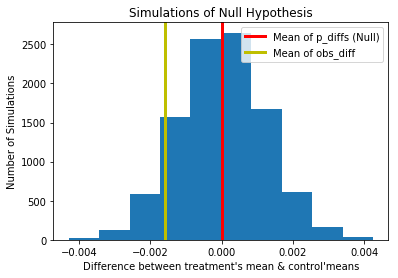

In [28]:
p_diffs_mean = np.array(p_diffs).mean()
plt.hist(p_diffs)
plt.title('Simulations of Null Hypothesis')
plt.ylabel('Number of Simulations')
plt.xlabel("Difference between treatment's mean & control'means")
plt.axvline(x=p_diffs_mean, color='r', linewidth=3, label='Mean of p_diffs (Null)')
plt.axvline(x=obs_diff, color='y', linewidth=3, label='Mean of obs_diff')
plt.legend();

In [29]:
(p_diffs > obs_diff).mean()

0.90510000000000002

In [30]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = data3.query('group == "control" & converted == 1').count()[0]

# number of conversions with the new_page
convert_new = data3.query('group == "treatment" & converted == 1').count()[0]

# number of individuals who were shown the old_page
n_old = data3.landing_page.value_counts()[1]

# number of individuals who received new_page
n_new =  data3.landing_page.value_counts()[0]
convert_old, convert_new, n_old, n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145311)

In [31]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
print(z_score, p_value)

1.31160753391 0.905173705141


In [32]:
data3[['treatment','ab_page']] = pd.get_dummies(data3['group'])
data3 = data3.drop('treatment', 1)
data3['intercept'] = 1
data3.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


In [33]:
log_mod = sm.Logit(data3['converted'], data3[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [34]:
results.summary2() 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-03-20 15:22 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

In [35]:
# Read the countries.csv
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [36]:
# Create the necessary dummy variables
countries[['CA','UK', 'US']] = pd.get_dummies(countries['country'])
countries.head()

,user_id,country,CA,UK,US
0,834778,UK,0,1,0
1,928468,US,0,0,1
2,822059,UK,0,1,0
3,711597,UK,0,1,0
4,710616,UK,0,1,0


In [37]:
# Join with the data3 dataframe
data3_and_countries = data3.join(countries.set_index('user_id'), on = 'user_id')
data3_and_countries.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [38]:
# Fit your model, and summarize the results
data3_and_countries[['UK', 'US']] = pd.get_dummies(data3_and_countries['country'])[['UK','US']]
log_mod = sm.Logit(data3_and_countries['converted'], data3_and_countries[['intercept', 'UK', 'US']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-03-20 15:22 AIC:              212781.0880
No. Observations:   290585           BIC:              212812.8269
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5176  0.1291  -0.0119   0.0935
==================================================================

"""

In [39]:
log_mod = sm.Logit(data3_and_countries['converted'], data3_and_countries[['intercept', 'UK', 'US', 'ab_page']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-03-20 15:22 AIC:              212781.3782
No. Observations:   290585           BIC:              212823.6968
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2486  0.0000  -2.0822  -1.9778
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5159  0.1296  -0.0119   0.0934
ab_page       -0.0150    0.0114   -1.3076  0.1910  -0.0374   0.0075
==================================================================

"""

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0